In [1]:
from inst_correlation import loadPrices, average_windowed_correlation, compute_linkage_matrix, plot_dendrogram, get_clusters, plot_clustered_correlation_matrix, group_instruments_by_cluster

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import percentileofscore, pearsonr, spearmanr
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, coint
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.regression.linear_model import OLS
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
import statsmodels.api as sm
import os
from matplotlib.cm import coolwarm, get_cmap
from statsmodels.tools.tools import add_constant
from matplotlib.colors import Normalize

In [2]:
### TO DEFINE VARIABLES ###
correlation_timeframe = 7
cluster_cutoff = 1.0
plot_graphs = True
negative_corr_pairs_included = False

In [3]:
# import data
(nt, nInst, prcAll) = loadPrices()
prcTest = prcAll[:, :450]
prcCheck = prcAll[:, 450:600]
prcEval = prcAll[:, 600:]
prcEvalPrev = prcAll
prcCheckPrev = prcAll[:, :600]
data_d = prcTest
data = data_d

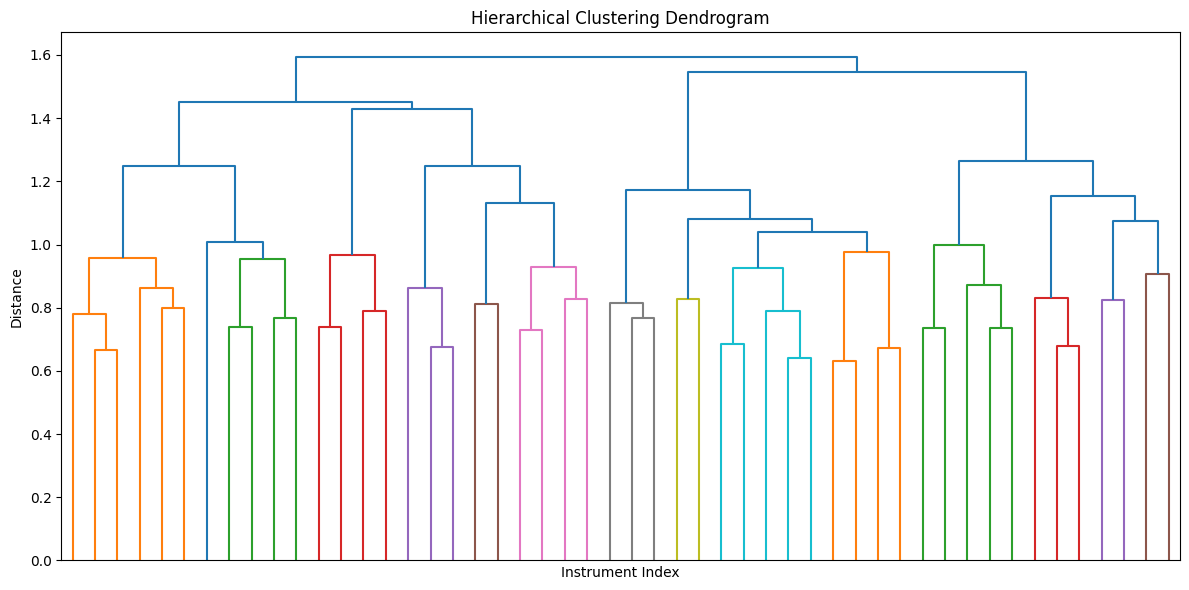

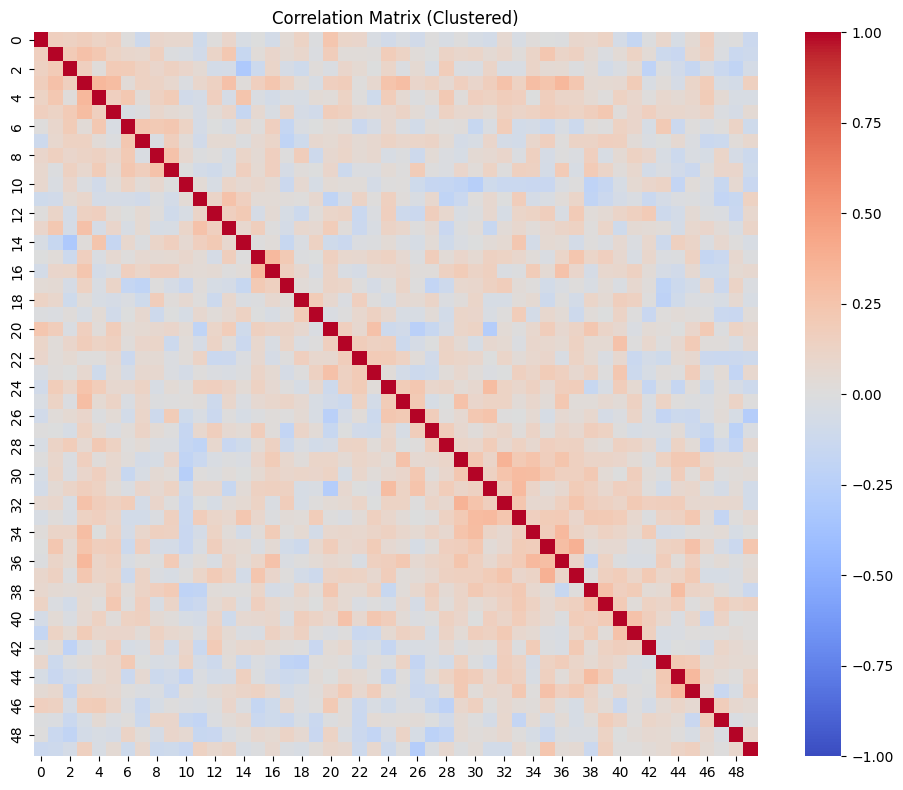

In [4]:
# Step 1: Compute average rolling correlation matrix
corr_matrix = average_windowed_correlation(data_d, window_size=correlation_timeframe, method='spearman')

# Step 2: Perform hierarchical clustering + get clusters
linkage_matrix = compute_linkage_matrix(corr_matrix, use_abs=negative_corr_pairs_included, method='ward')
clusters = get_clusters(linkage_matrix, cutoff=cluster_cutoff)
grouped_instruments = group_instruments_by_cluster(clusters)

# Step 3: Plot graphs if desired
if plot_graphs:
    plot_dendrogram(linkage_matrix, cutoff=cluster_cutoff)
    plot_clustered_correlation_matrix(corr_matrix, clusters)

In [5]:
# Example Exporting
import pickle
filename = "correlated_groups.pkl"

data = {
    'correlation_matrix': corr_matrix,
    'grouped_instruments': grouped_instruments
}
with open(filename, 'wb') as f:
    pickle.dump(data, f)

In [6]:
# Example Importing
import pickle

with open(filename, 'rb') as f:
    data = pickle.load(f)

corr_matrix, grouped_instruments = ['correlation_matrix'], data['grouped_instruments']